In [2]:
import pandas as pd
import numpy as np
import math as mt
from matplotlib import pyplot as plt
from scipy import stats as st

In [3]:
games = pd.read_csv("/datasets/games.csv")

In [4]:
games.info()
print(games["Platform"].unique())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB
['Wii' 'NES' 'GB' 'DS' 'X360' 'PS3' 'PS2' 'SNES' 'GBA' 'PS4' '3DS' 'N64'
 'PS' 'XB' 'PC' '2600' 'PSP' 'XOne' 'WiiU' 'GC' 'GEN' 'DC' 'PSV' 'SAT'
 'SCD' 'WS' 'NG' 'TG16' '3DO' 'GG' 'PCFX']


In [5]:
print(games.isna().sum())

Name                  2
Platform              0
Year_of_Release     269
Genre                 2
NA_sales              0
EU_sales              0
JP_sales              0
Other_sales           0
Critic_Score       8578
User_Score         6701
Rating             6766
dtype: int64


In [6]:
columns_lowered = []
for column in games.columns:
    columns1 = column.lower()
    columns_lowered.append(columns1)

games.columns = columns_lowered

In [7]:
games["year_of_release"] = games["year_of_release"].astype("Int64")
games["user_score"] = pd.to_numeric(games["user_score"], errors="coerce")

In [8]:
columns_to_replace = ["name", "genre", "rating"]

for column in columns_to_replace:
    games[column].fillna("unknown", inplace=True)

numeric_columns_to_replace = ["critic_score", "user_score"]

for column in numeric_columns_to_replace:
    games[column].fillna(0, inplace=True)

games["year_of_release"].dropna(inplace=True)

# Modificamos el tipo de datos en las siguientes columnas:

year_of_release (de float a int).
user_score (de object a float)

Ambas columnas contienen datos de tipo numerico

Decidi eliminar las filas con year_of_release sin valor y  reemplazar los datos ausentes en las demas columnas como 0 ya que no considero sustituir esos valores con la media o la mediana sea la mejor opcion y cero es un valor que nunca tendremos en ninguna de esas columnas asi que sera facil de identificar.



In [9]:
games["total_sales"] = games["na_sales"] + games["eu_sales"] + games["jp_sales"] + games["other_sales"]

In [10]:
games["year_of_release"].value_counts().sort_index()

1980       9
1981      46
1982      36
1983      17
1984      14
1985      14
1986      21
1987      16
1988      15
1989      17
1990      16
1991      41
1992      43
1993      62
1994     121
1995     219
1996     263
1997     289
1998     379
1999     338
2000     350
2001     482
2002     829
2003     775
2004     762
2005     939
2006    1006
2007    1197
2008    1427
2009    1426
2010    1255
2011    1136
2012     653
2013     544
2014     581
2015     606
2016     502
Name: year_of_release, dtype: Int64

Podemos observar que la cantidad de juegos lanzados entre 2002 a 2011 es significativamente mayor.

In [11]:
platform_sales = games.groupby("platform")["total_sales"].sum().sort_values(ascending=False)
print(platform_sales.head(10))

platform
PS2     1255.77
X360     971.42
PS3      939.65
Wii      907.51
DS       806.12
PS       730.86
GBA      317.85
PS4      314.14
PSP      294.05
PC       259.52
Name: total_sales, dtype: float64


In [12]:
top_platforms = platform_sales.head(10).index.tolist()

In [13]:
games_filtered = games[games["platform"].isin(top_platforms)]
yearly_distribution = games_filtered.groupby(["year_of_release", "platform"])["total_sales"].sum().unstack(fill_value=0)
print(yearly_distribution)

platform             DS    GBA     PC      PS     PS2     PS3     PS4    PSP  \
year_of_release                                                                
1985               0.02   0.00   0.04    0.00    0.00    0.00    0.00   0.00   
1988               0.00   0.00   0.03    0.00    0.00    0.00    0.00   0.00   
1992               0.00   0.00   3.03    0.00    0.00    0.00    0.00   0.00   
1994               0.00   0.00  12.87    6.03    0.00    0.00    0.00   0.00   
1995               0.00   0.00   4.22   35.96    0.00    0.00    0.00   0.00   
1996               0.00   0.00  10.58   94.70    0.00    0.00    0.00   0.00   
1997               0.00   0.00  11.27  136.17    0.00    0.00    0.00   0.00   
1998               0.00   0.00   3.26  169.49    0.00    0.00    0.00   0.00   
1999               0.00   0.00   4.74  144.53    0.00    0.00    0.00   0.00   
2000               0.00   0.07   4.66   96.37   39.17    0.00    0.00   0.00   
2001               0.00  61.53   5.47   

En el caso de las 3 consolas mas populares (PS2, X360 y PS3) el tiempo de vida de la consola fue aproximadamente 10 años.
Si queremos construir un modelo para 2017 tendriamos que tomar por lo menos 5 años de datos previos. Tomaremos 2011 como el primer año.
Para este periodo la unica plataforma rentable en nuestro dataset es la PS4, lanzada alrededor de 2013, podemos proyectar su tiempo de vida aproximado a 2023.
No tenemos datos de su competencia la Xbox One, que tambien fue lanzada en 2013.
Pero podemos considerar la Pc como una plataforma rentable ya que esta no tiene tiempo de vida como las otras plataformas.


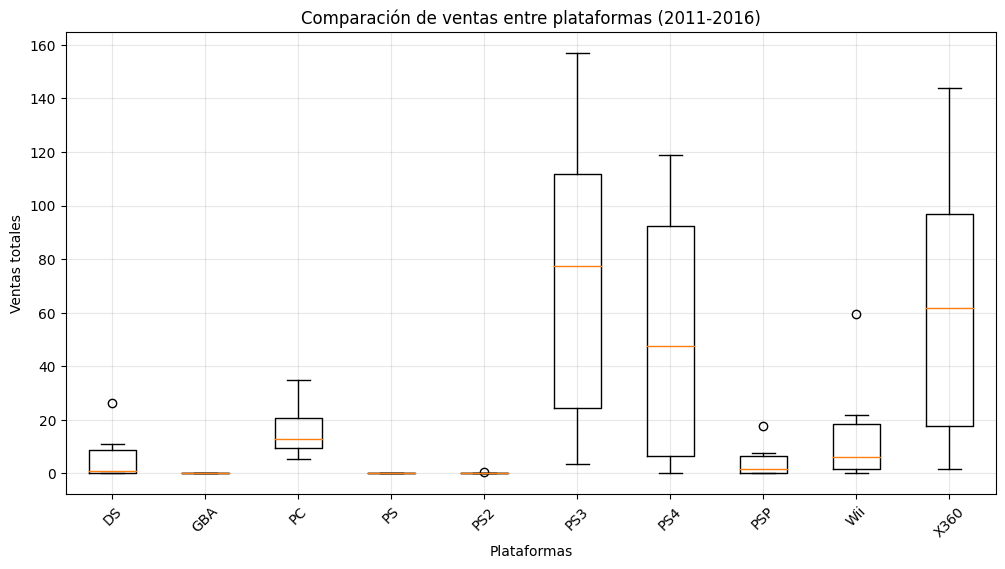

In [14]:
games_filtered_2011 = games_filtered[games_filtered["year_of_release"] >= 2011]
games_filtered_2011 = games_filtered_2011[(games_filtered_2011["critic_score"] > 0)]
games_filtered_2011 = games_filtered_2011[(games_filtered_2011["user_score"] > 0)]

yearly_distribution_filtered = yearly_distribution.loc[2011:]

data_for_boxplot = yearly_distribution_filtered.melt(var_name='platform', value_name='sales')


plt.figure(figsize=(12, 6))
plt.boxplot([data_for_boxplot[data_for_boxplot['platform'] == platform]['sales'] 
             for platform in yearly_distribution_filtered.columns], 
            labels=yearly_distribution_filtered.columns)
plt.title("Comparación de ventas entre plataformas (2011-2016)")
plt.ylabel("Ventas totales")
plt.xlabel("Plataformas")
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3)
plt.show()


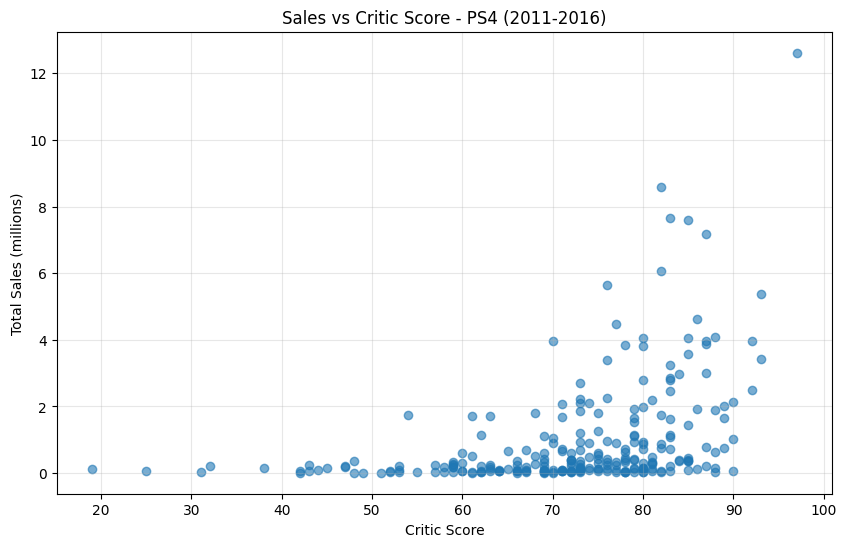

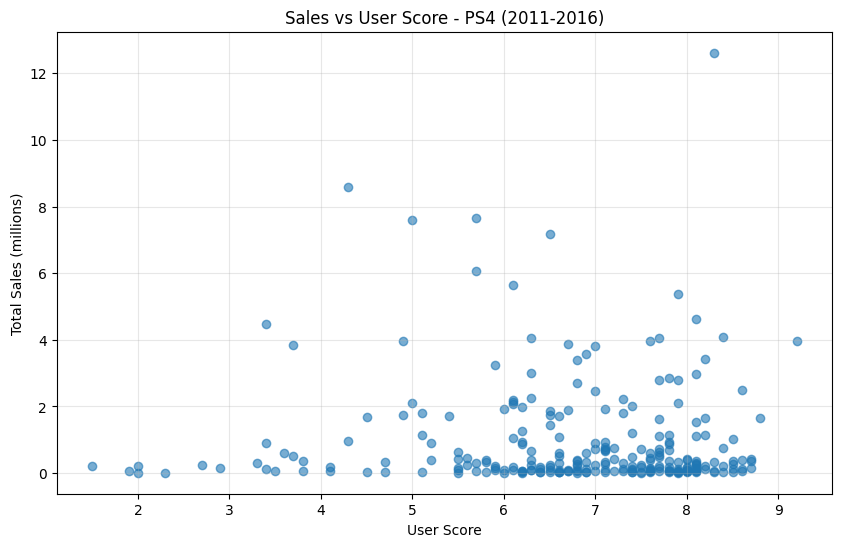

In [15]:
ps4_games = games_filtered_2011[games_filtered_2011["platform"] == "PS4"]
ps4_games = ps4_games[(ps4_games["critic_score"] > 0)]
ps4_games = ps4_games[(ps4_games["user_score"] > 0)]

plt.figure(figsize=(10, 6))
plt.scatter(ps4_games["critic_score"], ps4_games["total_sales"], alpha=0.6)
plt.xlabel("Critic Score")
plt.ylabel("Total Sales (millions)")
plt.title( "Sales vs Critic Score - PS4 (2011-2016)")
plt.grid(True, alpha=0.3)
plt.show()

plt.figure(figsize=(10, 6))
plt.scatter(ps4_games["user_score"], ps4_games["total_sales"], alpha=0.6)
plt.xlabel("User Score")
plt.ylabel("Total Sales (millions)")
plt.title( "Sales vs User Score - PS4 (2011-2016)")
plt.grid(True, alpha=0.3)
plt.show()

In [16]:
print(f"El coeficiente de correlación entre ventas y calificación de usuarios es: {ps4_games['user_score'].corr(ps4_games['total_sales']):.4f}")

print(f"El coeficiente de correlación entre ventas y calificación de criticos es: {ps4_games['critic_score'].corr(ps4_games['total_sales']):.4f}")

El coeficiente de correlación entre ventas y calificación de usuarios es: -0.0336
El coeficiente de correlación entre ventas y calificación de criticos es: 0.4059


Podemos observar que el coeficiente entre ventas y calificacion de usuarios es negativo pero muy cercano a cero. Esto indica que no hay una correlacion (al menos lineal) entre estas dos variables.
Esto tiene sentido ya que generalmente un usuario califica un juego despues de haberlo comprado, y en este caso la calificacion dada no depende de si se vendio mucho o poco.

En cambio obtenemos un coeficiente positivo y moderado entre las ventas y la calificacion de criticos, lo cual indica que hay una correlacion positiva.
La calificacion de criticos generalmente es revelada antes de que el juego salga a la venta al publico en general, entonces tiene sentido que si un juego obtiene una calificacion positiva, las ventas de este sean mayores.

In [17]:
#Vamos a analizar las ventas de los top 10 juegos mas vendidos:

In [18]:

platform_sales = games.sort_values(by="total_sales", ascending=False)
platform_sales = games[(games["critic_score"] > 0)]
platform_sales = games[(games["user_score"] > 0)]
print(platform_sales[["name", "critic_score", "user_score", "total_sales"]].head(10))


                         name  critic_score  user_score  total_sales
0                  Wii Sports          76.0         8.0        82.54
2              Mario Kart Wii          82.0         8.3        35.52
3           Wii Sports Resort          80.0         8.0        32.77
6       New Super Mario Bros.          89.0         8.5        29.80
7                    Wii Play          58.0         6.6        28.91
8   New Super Mario Bros. Wii          87.0         8.4        28.32
11              Mario Kart DS          91.0         8.6        23.21
13                    Wii Fit          80.0         7.7        22.70
14         Kinect Adventures!          61.0         6.3        21.82
15               Wii Fit Plus          80.0         7.4        21.80


Investigando un poco podemos clasificar Wii Play y Kinect Adventures como valores atipicos debido
a que Kinect adventures se incluia con el Kinect para Xbox y Wii play incluia un control en la compra.

Podemos observar que los top juegos mas vendidos obtuvieron muy buenas reseñas de criticos lo que confirma nuestro analisis del coeficiente de correlacion.

In [19]:
print(games_filtered_2011.groupby("genre")["total_sales"].sum().sort_values(ascending=False))
# A continuacion se muestran los generos con mas ventas en general para juegos lanzados a partir
# de 2011

genre
Action          343.14
Shooter         279.89
Sports          134.67
Role-Playing     97.01
Misc             44.52
Racing           38.25
Fighting         37.58
Platform         22.94
Adventure        16.41
Simulation       13.96
Strategy         13.74
Puzzle            0.02
Name: total_sales, dtype: float64


In [20]:
na_sales = games_filtered_2011.sort_values(by="na_sales", ascending=False)

eu_sales = games_filtered_2011.sort_values(by="eu_sales", ascending=False)

jp_sales = games_filtered_2011.sort_values(by="jp_sales", ascending=False)

print(f' Las plataformas principales en NA son: {games_filtered_2011.groupby("platform")["na_sales"].sum().sort_values(ascending=False)}')
print(f' Las plataformas principales en EU son: {games_filtered_2011.groupby("platform")["eu_sales"].sum().sort_values(ascending=False)}')
print(f' Las plataformas principales en JP son: {games_filtered_2011.groupby("platform")["jp_sales"].sum().sort_values(ascending=False)}')




 Las plataformas principales en NA son: platform
X360    186.16
PS3     136.25
PS4      84.46
PC       27.64
Wii      24.27
DS        3.48
PSP       0.88
Name: na_sales, dtype: float64
 Las plataformas principales en EU son: platform
PS3     126.37
PS4     112.44
X360     94.86
PC       50.24
Wii      14.61
DS        0.67
PSP       0.48
Name: eu_sales, dtype: float64
 Las plataformas principales en JP son: platform
PS3     29.98
PS4      9.43
Wii      4.00
X360     2.60
PSP      1.81
DS       0.90
PC       0.00
Name: jp_sales, dtype: float64


Con esta informacion podemos inferir que el numero de ventas por region esta ligado a la poblacion de la misma.
La union europea y norteamerica cuentan con poblaciones similares (440-450 millones) mientras que la poblacion de japon es significativamente menor (124 millones).

In [27]:
print(f' Los generos mas populares en NA son: {games_filtered_2011.groupby("genre")["na_sales"].sum().sort_values(ascending=False)}')
print(f' Los generos mas populares en EU son: {games_filtered_2011.groupby("genre")["eu_sales"].sum().sort_values(ascending=False)}')
print(f' Los generos mas populares en JP son: {games_filtered_2011.groupby("genre")["jp_sales"].sum().sort_values(ascending=False)}')

 Los generos mas populares en NA son: genre
Action          143.45
Shooter         130.82
Sports           65.35
Role-Playing     40.95
Misc             25.95
Fighting         18.50
Racing           11.70
Platform          9.79
Adventure         6.76
Strategy          5.45
Simulation        4.42
Puzzle            0.00
Name: na_sales, dtype: float64
 Los generos mas populares en EU son: genre
Action          136.85
Shooter         106.20
Sports           49.76
Role-Playing     34.23
Racing           20.42
Misc             12.25
Fighting         10.28
Platform          8.49
Simulation        7.65
Adventure         6.81
Strategy          6.71
Puzzle            0.02
Name: eu_sales, dtype: float64
 Los generos mas populares en JP son: genre
Action          17.28
Role-Playing    10.66
Shooter          8.18
Fighting         4.49
Misc             2.09
Sports           1.89
Platform         1.76
Racing           1.01
Adventure        0.74
Simulation       0.60
Strategy         0.02
Puzzle      

Los generos mas vendidos en EU y NA son Action, Shooter y Sports. 
En EU el soccer es mas popular por eso FIFA es de los juegos mas vendidos.
En Japon Role-Playing reemplaza a sports, lo cual es de esperarse ya que este tipo de juegos son muy populares en esa region.

In [22]:
print(na_sales[["name", "platform", "genre", "na_sales", "rating"]].head(10))
print()
print(eu_sales[["name", "platform", "genre", "eu_sales", "rating"]].head(10))
print()
print(jp_sales[["name", "platform", "genre", "jp_sales", "rating"]].head(10))



                              name platform         genre  na_sales rating
23              Grand Theft Auto V     X360        Action      9.66      M
29  Call of Duty: Modern Warfare 3     X360       Shooter      9.04      M
35      Call of Duty: Black Ops II     X360       Shooter      8.25      M
16              Grand Theft Auto V      PS3        Action      7.02      M
60            Call of Duty: Ghosts     X360       Shooter      6.73      M
66                          Halo 4     X360       Shooter      6.65      M
61                    Just Dance 3      Wii          Misc      5.95   E10+
37  Call of Duty: Modern Warfare 3      PS3       Shooter      5.54      M
75     The Elder Scrolls V: Skyrim     X360  Role-Playing      5.05      M
34      Call of Duty: Black Ops II      PS3       Shooter      4.99      M

                               name platform    genre  eu_sales rating
16               Grand Theft Auto V      PS3   Action      9.09      M
42               Grand Theft Aut

Observamos que en NA y EU la mayoria de los juegos mas vendidos son clasificacion M (+18) mientras que en JP la clasificacion de juegos es mas variada.

In [23]:

#La hipotesis nula es que no hay una diferencia entre las calificaciones promedio de usuarios para 
#plataformas Xone y PC.
#La hipotesis alternativa es que si hay una diferencia entre las calificaciones.
#Propongo una prueba de hipótesis de dos colas ya que nos interesa si hay diferencia, ya sea menor o mayor.
#Propongo un valor alfa de 5%

xone_data = games[games["year_of_release"] >= 2011]
xone_data = xone_data[xone_data["platform"] == "XOne"].sort_values(by="user_score", ascending=False)

pc_data = games[games["year_of_release"] >= 2011]
pc_data = pc_data[pc_data["platform"] == "PC"].sort_values(by="user_score", ascending=False)

#Realizamos prueva de Levene para determinar la igualdad de varianzas:


estadistico, p_valor = st.levene(xone_data["user_score"], pc_data["user_score"])
print(f'Estadístico de Levene: {estadistico}, p-valor: {p_valor}')
print("El valor de p es mayor al valor de alpha, por lo tanto no podemos rechazar la igualdad de varianzas")



Estadístico de Levene: 0.23796777785305512, p-valor: 0.6258464085387012
El valor de p es mayor al valor de alpha, por lo tanto no podemos rechazar la igualdad de varianzas


In [28]:
alpha = 0.05 

results1 = st.ttest_ind(xone_data["user_score"], pc_data["user_score"], equal_var=True) 

print()
print('valor p:', results1.pvalue)

if results1.pvalue < alpha:
    print("Rechazamos la hipótesis nula si hay una diferencia entre las calificaciones promedio de usuarios para plataformas Xone y PC")
else:
    print("No podemos rechazar la hipótesis nula, no hay una diferencia entre las calificaciones promedio de usuarios para plataformas Xone y PC")




valor p: 0.24758279963021285
No podemos rechazar la hipótesis nula, no hay una diferencia entre las calificaciones promedio de usuarios para plataformas Xone y PC


In [25]:
#La hipotesis nula es que no hay una diferencia entre las calificaciones promedio de usuarios entre 
#generos accion y deporte.
#La hipotesis alternativa es que si hay una diferencia entre las calificaciones.
#Propongo una prueba de hipótesis de dos colas ya que nos interesa si hay diferencia, ya sea menor o mayor.
#Propongo un valor alfa de 5%

action_data = games[games["year_of_release"] >= 2011]
action_data = action_data[action_data["genre"] == "Action"].sort_values(by="user_score", ascending=False)

sports_data = games[games["year_of_release"] >= 2011]
sports_data = sports_data[sports_data["genre"] == "Sports"].sort_values(by="user_score", ascending=False)

#Realizamos prueva de Levene para determinar la igualdad de varianzas:


estadistico1, p_valor1 = st.levene(action_data["user_score"], sports_data["user_score"])
print(f'Estadístico de Levene: {estadistico1}, p-valor: {p_valor1}')
print("El valor de p es menor al valor de alpha, por lo tanto podemos rechazar la igualdad de varianzas")


Estadístico de Levene: 95.58354900896651, p-valor: 5.503613461075207e-22
El valor de p es menor al valor de alpha, por lo tanto podemos rechazar la igualdad de varianzas


In [29]:
alpha = 0.05 

results2 = st.ttest_ind(action_data["user_score"], sports_data["user_score"], equal_var=False) 

print()
print('valor p:', results2.pvalue)

if results2.pvalue < alpha:
    print("Rechazamos la hipótesis nula, si hay una diferencia entre las calificaciones promedio de usuarios entre generos accion y deporte.")
else:
    print("No podemos rechazar la hipótesis nula, nohay una diferencia entre las calificaciones promedio de usuarios entre generos accion y deporte.")



valor p: 0.8783901650204647
No podemos rechazar la hipótesis nula, nohay una diferencia entre las calificaciones promedio de usuarios entre generos accion y deporte.


En conclusion pudimos obtener pistas y tendencias generales mediante el analisis de datos del dataset proporcionado.

Considero que debemos poner atencion a los siguientes puntos para elaborar nuestra estrategia de ventas para el siguiente año:

- El tiempo de vida de una consola es aproximadamente 10 años (descartando PC). Las ultimas consolas de Playstation y Microsoft fueron lanzadas en 2013 asi que todavia tenemos un margen de 7 años para los proximos juegos.
- Debemos tener en cuenta las reseñas de los criticos, ya que nuestros datos muestran una correlacion positiva entre estas y las ventas de juegos.
- Debemos tomar en cuenta la poblacion de cada region.
- Los generos mas rentables son deportes, accion y shooter. RPG merece una mencion especial en la region de JP.
- Un juego clasificacion M tiene mas probabilidades de exito en las regiones de NA y EU.